In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: >

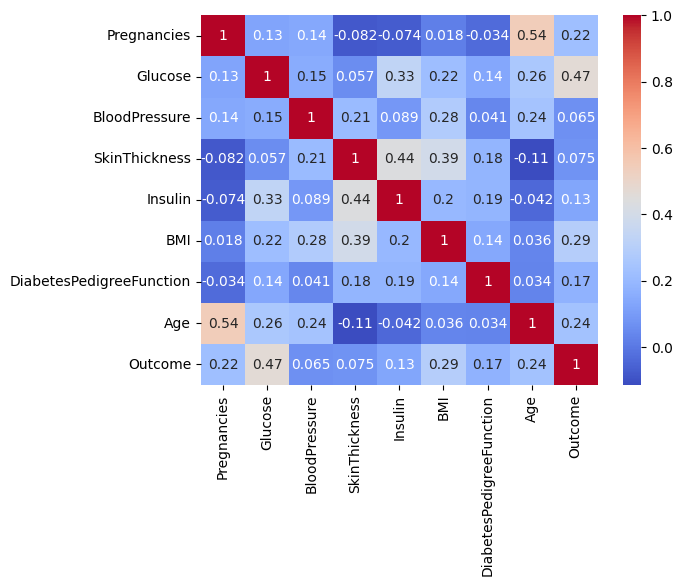

In [12]:
print(df['Outcome'].value_counts())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [22]:
final_outcome=df.corr()
final_outcome=final_outcome["Outcome"].sort_values(ascending=False)
print(final_outcome)
print("Choose first one for prediction and second to five for linear relationship.")

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Choose first one for prediction and second to five for linear relationship.


In [24]:
X = df.drop(columns='Outcome')  # All features
y = df['Outcome']               # Target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [42]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Accuracy: 0.6770833333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       123
           1       0.54      0.65      0.59        69

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.69      0.68      0.68       192

Confusion Matrix:
 [[85 38]
 [24 45]]


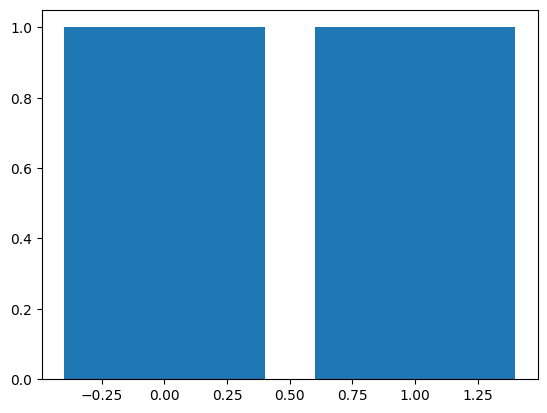

In [44]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.bar(y_test,y_pred)
plt.show()

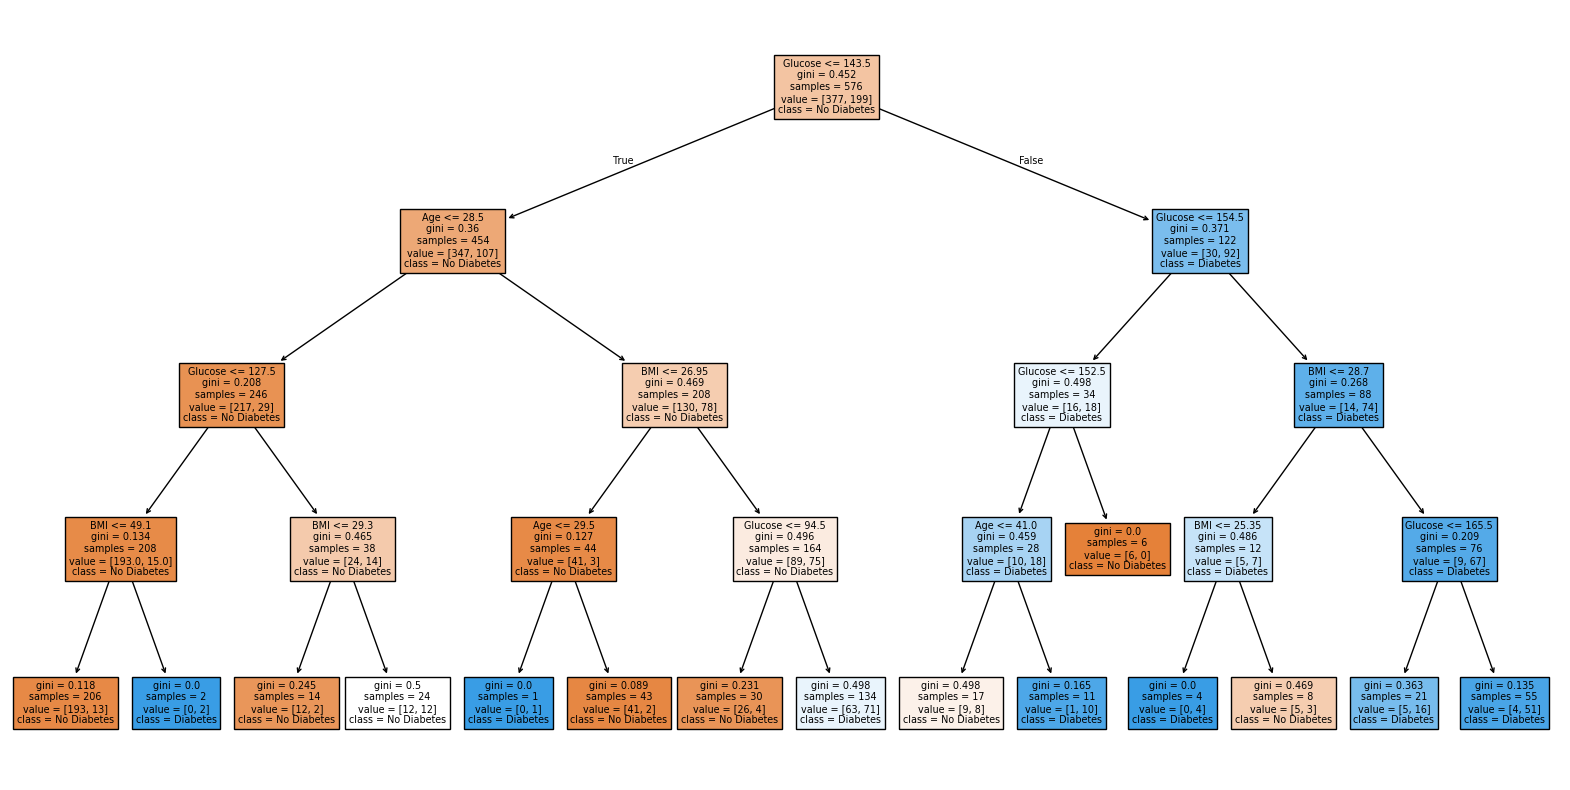

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load data
df = pd.read_csv("diabetes.csv")
X = df[['Glucose', 'BMI', 'Age', 'Pregnancies']]  # Top 4 features
y = df['Outcome']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7135416666666666
Confusion Matrix:
 [[94 29]
 [26 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       123
           1       0.60      0.62      0.61        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.71      0.71       192



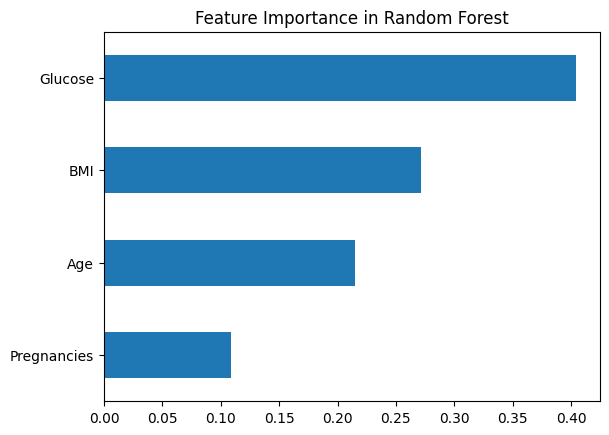

In [36]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()
